In [1]:
# Importing the required libraries and methods
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
pd.set_option("max_columns", None)
import warnings
warnings.filterwarnings("ignore")
import time
import datetime
reviews = pd.read_csv("./Data/reviews.csv/reviews.csv")
listings = pd.read_csv("./Data/listings.csv/listings.csv")
summary_reviews = pd.read_csv("./Data/summary_reviews.csv")
summary_listings = pd.read_csv("./Data/summary_listings.csv")

In [2]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import math
import datetime as dt

In [3]:
#join on id and listing id

reviews = pd.DataFrame.drop(reviews, columns=[
    'id',
    'date',
    'reviewer_id',
    'reviewer_name'


])
def calculate_sentiment(entry):
    if (type(entry) != str and math.isnan(entry)):
        return -55
    opinion = TextBlob(entry)
    return opinion.sentiment.polarity


reviews['comments'] = reviews['comments'].apply(calculate_sentiment)
reviews = reviews[reviews['comments'] != -55]
reviews = reviews.groupby('listing_id')['comments']. mean()

In [4]:
reviews = reviews.reset_index()

In [5]:
data = listings.copy()
# Taking out the unwanted columns
print(len(data.columns))
data = pd.DataFrame.drop(data, columns=[
    'host_name',
    'notes', # Added PRK
    'host_about', # Added PRK
    'calendar_updated', # Added PRK
    'host_acceptance_rate',
    'description',
    'thumbnail_url',
    'experiences_offered',
    'listing_url',
    'name',
    'summary',
    'space',
    'scrape_id',
    'last_scraped',
    'neighborhood_overview',
    'transit',
    'access',
    'interaction',
    'house_rules',
    'medium_url',
    'picture_url',
    'xl_picture_url',
    'host_url',
    'host_thumbnail_url',
    'host_picture_url',
    'host_acceptance_rate',
    'smart_location',
    'license',
    'jurisdiction_names',
    'street',
    'neighbourhood',
    'country',
    'country_code',
    'host_location',
    'host_neighbourhood',
    'market',
    'is_location_exact',
    'square_feet',
    'weekly_price',
    'monthly_price',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'calendar_last_scraped',
    'first_review',
    'last_review',
    'requires_license',
    'calculated_host_listings_count',
    'host_listings_count',

     #discuss last two
    'zipcode' # Added PRK

])
# print(list(data))


print('Splitting host verifications')
host_verification_set = set()

def collect_host_verifications(entry):
    entry_list = entry.replace("[", "").replace("]", "").replace("'", "").replace('"', "").replace(" ", "").split(',')
    for verification in entry_list:
        if (verification != "" and verification != 'None'):
            host_verification_set.add(verification +"_verification")

data['host_verifications'].apply(collect_host_verifications)

def generic_verification(entry, v):
    entry_list = str(entry).replace("[", "").replace("]", "").replace("'", "").replace('"', "").replace(" ", "").split(',')
    for verification in entry_list:
        if (verification + "_verification" == v):
            return 1
    return 0

for v in host_verification_set:
    data.insert(len(list(data)), v, 0)
    data[v] = data['host_verifications'].apply(lambda x: generic_verification(x, v))

data = pd.DataFrame.drop(data, columns=['host_verifications'])

def clean_response_rate(entry):
    if (type(entry) == str):
        return entry.replace('%', '')
    else:
        return 0


data['host_response_rate'] = data['host_response_rate'].apply(clean_response_rate)

def clean_superhost(entry):
    if (entry == 't'):
        return 1
    else:
        return 0
data['host_is_superhost'] = data['host_is_superhost'].apply(clean_superhost)
data['host_has_profile_pic'] = data['host_has_profile_pic'].apply(clean_superhost)
data['host_identity_verified'] = data['host_identity_verified'].apply(clean_superhost)
data['has_availability'] = data['has_availability'].apply(clean_superhost)
data['instant_bookable'] = data['instant_bookable'].apply(clean_superhost)
data['is_business_travel_ready'] = data['is_business_travel_ready'].apply(clean_superhost)
data['require_guest_profile_picture'] = data['require_guest_profile_picture'].apply(clean_superhost)
data['require_guest_phone_verification'] = data['require_guest_phone_verification'].apply(clean_superhost)

"""
print(list(data))
print(data['host_verifications'][0])
for v in host_verification_set:
    print(v, " ", data[v][0])
"""
def clean_price(entry):
    if (type(entry) != str and math.isnan(entry)):
        return -55
    entry1 = entry.replace('$', '').replace(',', '')
    if (float(entry1) == 0):
        return -55
    return np.log(float(entry1))


def clean_number(entry):
    if (math.isnan(entry)):
        return 0
    else:
        return entry
def clean_number_removal(entry):
    if (math.isnan(entry)):
        return -55
    else:
        return entry
data['bathrooms'] = data['bathrooms'].apply(clean_number_removal)
data['bedrooms'] = data['bedrooms'].apply(clean_number_removal)
data['beds'] = data['beds'].apply(clean_number_removal)
data = data[data['bathrooms'] != -55]
data = data[data['bedrooms'] != -55]
data = data[data['beds'] != -55]

def reviews_per_month_cleanup(entry):
    if (math.isnan(entry)):
        return 0
    return entry

data['reviews_per_month'] = data['reviews_per_month'].apply(reviews_per_month_cleanup)
data['price'] = data['price'].apply(clean_price)
data = data[data['price'] != -55]
data['extra_people'] = data['extra_people'].apply(clean_price)
data['security_deposit'] = data['security_deposit'].apply(clean_price)
data['cleaning_fee'] = data['cleaning_fee'].apply(clean_price)
def clean_listings_count(entry):
    if (math.isnan(entry)):
        return 1
    return entry
data['host_total_listings_count'] = data['host_total_listings_count'].apply(clean_listings_count)

106
Splitting host verifications


In [6]:
print('Spliting amenities')
amenities_set = set()
def collect_amenities(entry):
    entry_list = entry.replace("{", "").replace("}", "").replace("'", "").replace('"', "").replace(" ", "_").split(',')
    for am in entry_list:
        if ('translation_missing' not in am and am != ''):
            amenities_set.add(am)

data['amenities'].apply(collect_amenities)
#print(amenities_set)


def generic_amenities(entry, amenity):
    entry_list = entry.replace("{", "").replace("}", "").replace("'", "").replace('"', "").replace(" ", "_").split(',')
    for am in entry_list:
        if (am == amenity):
            return 1
    return 0

for amenity in amenities_set:
    data.insert(len(list(data)), amenity, 0)
    data[amenity] = data['amenities'].apply(lambda x: generic_amenities(x, amenity))

#print(data['amenities'][0])
#for v in  amenities_set:
#    print(v, " ", data[v][0])


#maybe drop the original column??
data = pd.DataFrame.drop(data, columns=['amenities', 'state'])

for col_name in ['property_type', 'bed_type',
                 'room_type', 'neighbourhood_group_cleansed', 'city',
                 'cancellation_policy', 'host_response_time', 'neighbourhood_cleansed']:
    parsed_cols = pd.get_dummies(data[col_name])
    data = data.drop(columns=[col_name])
    data = pd.concat([data, parsed_cols], axis = 1)

# Changing the host_since to number of days until 10 Nov 2018
def clean_host_since(entry):
    if (type(entry) != str and math.isnan(entry)):
        return -55
    return entry
data['host_since'] = data['host_since'].apply(clean_host_since)
data = data[data['host_since'] != -55]
dummy_date = dt.datetime(2018,11,10)
data.host_since = (dummy_date - pd.to_datetime(data.host_since))
data.host_since = data.host_since.apply(lambda x: float(x.days))



for col_name in ['review_scores_rating', 'review_scores_accuracy',
                 'review_scores_cleanliness', 'review_scores_checkin',
                 'review_scores_communication', 'review_scores_location',
                 'review_scores_value']:
    data[col_name] = data[col_name].apply(lambda x: 0 if np.isnan(x) else x)

data[col_name] = data[col_name].apply(lambda x: 0 if np.isnan(x) else x)
data = data.set_index('id').join(reviews.set_index('listing_id'))
def clean_comments(entry):
    if (type(entry) != str and math.isnan(entry)):
        return 0
    return entry
data['comments'] = data['comments'].apply(clean_comments)

Spliting amenities


In [7]:
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#caller.set_index('key').join(other.set_index('key'))


random.seed(13)


def normalize(X_train, X_val, X_test):
    X_train_normalized = X_train.values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(X_train_normalized)

    # Run the normalizer on the dataframe
    x = pd.DataFrame(x_scaled, columns=X_train.columns)

    X_val_normalized = X_val.values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_val_scaled = min_max_scaler.fit_transform(X_val_normalized)

    # Run the normalizer on the dataframe
    x_v = pd.DataFrame(x_val_scaled, columns=X_val.columns)

    X_test_normalized = X_test.values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_test_scaled = min_max_scaler.fit_transform(X_test_normalized)

    # Run the normalizer on the dataframe
    x_t = pd.DataFrame(x_test_scaled, columns=X_test.columns)
    return x, x_v, x_t



def split(dataset, val_frac=0.10, test_frac=0.10):
    X = dataset.loc[:, dataset.columns != 'price']
    X = X.loc[:, X.columns != 'id']
    X = X.loc[:, X.columns != 'host_id']
    X = X.loc[:, X.columns != 'Unnamed: 0']

    y = dataset['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(val_frac+test_frac), random_state=1)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_frac/(val_frac+test_frac), random_state=1)

    return X_train, y_train, X_val, y_val, X_test, y_test


In [8]:
X_train, y_train, X_val, y_val, X_test, y_test = split(data)

X_train, X_val, X_test = normalize(X_train, X_val, X_test)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from sklearn import linear_model
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import sklearn as sklearn
import multiprocessing

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import RandomTreesEmbedding
from sklearn.neural_network import MLPRegressor
#from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Imputer
from sklearn import metrics

import statsmodels.api as sm
from keras import optimizers
from sklearn.linear_model import SGDRegressor
#import statsmodels.api as sm


from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1

import copy

# NN parameters
NUM_ITERATIONS = 300
BATCH_SIZE = 256
LEARNING_RATE = 0.001
LASSO_COEF = 50.0
DECAY_RATE = 0.0001

plt.style.use("ggplot")
n_cores = multiprocessing.cpu_count() # Getting the number of cores for multiprocessing

def get_gaussian_process_regressor():
    gp = GaussianProcessRegressor()
    return [gp], ['Gaussian Process']


def get_mlp_regressor(num_hidden_units=51):
    mlp = MLPRegressor(hidden_layer_sizes=num_hidden_units)
    return [mlp], ['Multi-Layer Perceptron']


def get_ensemble_models():
    grad = GradientBoostingRegressor(n_estimators=17, random_state=42, loss='lad', learning_rate=0.12, max_depth=10)
    classifier_list = [grad]
    classifier_name_list = ['Gradient Boost']
    return classifier_list, classifier_name_list


def print_evaluation_metrics(trained_model, trained_model_name, X_test, y_test):
    print('--------- For Model: ', trained_model_name, ' ---------\n')
    predicted_values = trained_model.predict(X_test)
    print("Mean absolute error: ",
          metrics.mean_absolute_error(y_test, predicted_values))
    print("Median absolute error: ",
          metrics.median_absolute_error(y_test, predicted_values))
    print("Mean squared error: ", metrics.mean_squared_error(
        y_test, predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))



def print_evaluation_metrics2(trained_model, trained_model_name, X_test, y_test):
    print('--------- For Model: ', trained_model_name, ' --------- (Train Data)\n')
    predicted_values = trained_model.predict(X_test)
    print("Mean absolute error: ",
          metrics.mean_absolute_error(y_test, predicted_values))
    print("Median absolute error: ",
          metrics.median_absolute_error(y_test, predicted_values))
    print("Mean squared error: ", metrics.mean_squared_error(
        y_test, predicted_values))
    print("R2: ", metrics.r2_score(y_test, predicted_values))


def svm(X_train, y_train, X_val, y_val):
    model = SVR(gamma = 0.05, verbose = True) #was empty #0.1 #the - best gamma 0.05, c=0.5
    model.fit(X_train, y_train)
    print_evaluation_metrics(model, "svm", X_val, y_val.values.ravel())
    print_evaluation_metrics2(model, "svm", X_train, y_train.values.ravel())

def LinearModel(X_train, y_train, X_val, y_val):
    regr = linear_model.LinearRegression(n_jobs=int(0.8*n_cores)).fit(X_train, y_train)
    print_evaluation_metrics(regr, "linear model", X_val, y_val.values.ravel())
    print_evaluation_metrics2(regr, "linear model", X_train, y_train.values.ravel())

    return


def LinearModelRidge(X_train, y_train, X_val, y_val):
    regr = Ridge(alpha = 7) #7
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_val.values)

    print('Coefficients: \n', regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
    print('Variance score: %.2f' % r2_score(y_val, y_pred))
    print("R2:", sklearn.metrics.r2_score(y_val, y_pred))

    print_evaluation_metrics(regr, "Linear Model Ridge", X_val, y_val)
    print_evaluation_metrics2(regr, "Linear Model Ridge", X_train, y_train)
    return

def LinearModelLasso(X_train, y_train, X_val, y_val):
    regr = Lasso(alpha = 0.5) #0.5
    regr.fit(X_train, y_train)

    print_evaluation_metrics(regr, "Linear Model Lasso", X_val, y_val)
    print_evaluation_metrics2(regr, "Linear Model Lasso", X_train, y_train)
    return



def simple_neural_network(X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(Dense(units=20, activation='relu', input_dim=len(X_train.values[0])))
    model.add(Dense(units=5, activation='relu'))
    model.add(Dense(units=1, activation='linear'))
    adam = optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=DECAY_RATE, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=adam)
    model.fit(X_train, y_train, epochs=NUM_ITERATIONS, batch_size=BATCH_SIZE)
    print("finished fitting")
    print_evaluation_metrics(model, "NN", X_val, y_val)
    print_evaluation_metrics2(model, "NN", X_train, y_train)
    return


def kmeans(X_train, y_train, X_val, y_val):
    n_clusters = 8
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, verbose=0, n_jobs=int(0.8*n_cores)).fit(X_train)
    c_train = kmeans.predict(X_train)
    c_pred = kmeans.predict(X_val)
    centroids = kmeans.cluster_centers_
    y_val_stats = None
    predicted_values = None
    y_train_stats = None
    labels_stats = None
    for i in range(n_clusters):
        print('--------analyzing cluster %d--------' %i)
        train_mask = c_train==i
        std_train = np.std(y_train[train_mask])
        mean_train = np.mean(y_train[train_mask])
        print("# examples & price mean & std for training set within cluster %d is:(%d, %.2f, %.2f)" %(i, train_mask.sum(), np.float(mean_train), np.float(std_train)))
        pred_mask = c_pred==i
        std_pred = np.std(y_val[pred_mask])
        mean_pred = np.mean(y_val[pred_mask])
        print("# examples & price mean & std for validation set within cluster %d is:(%d, %.2f, %.2f)" %(i, pred_mask.sum(), np.float(mean_pred), np.float(std_pred)))
        if pred_mask.sum() == 0:
            print('Zero membered test set! Skipping the test and training validation.')
            continue
        #LinearModelRidge(X_train[train_mask], y_train[train_mask], X_val[pred_mask], y_val[pred_mask])
        regr = Ridge(alpha = 7) #7
        regr.fit(X_train[train_mask], y_train[train_mask])
        labels_pred = regr.predict(X_train[train_mask].values)
        y_pred = regr.predict(X_val[pred_mask].values)
        if (y_val_stats is None):
            y_val_stats = copy.deepcopy(y_val[pred_mask])
            y_train_stats = copy.deepcopy(y_train[train_mask])
            predicted_values = copy.deepcopy(y_pred)
            labels_stats = copy.deepcopy(labels_pred)

        else:
            y_val_stats = y_val_stats.append(y_val[pred_mask])
            y_train_stats = y_train_stats.append(y_train[train_mask])
            predicted_values = np.append(predicted_values, y_pred)
            labels_stats = np.append(labels_stats, labels_pred)
        print('--------Finished analyzing cluster %d--------' %i)
    print("Mean absolute error: ",
          metrics.mean_absolute_error(y_val_stats, predicted_values))
    print("Median absolute error: ",
          metrics.median_absolute_error(y_val_stats, predicted_values))
    print("Mean squared error: ", metrics.mean_squared_error(
        y_val_stats, predicted_values))
    print("R2: ", metrics.r2_score(y_val_stats, predicted_values))
    print('------------TRAIN--------------------')
    print("Mean absolute error: ",
        metrics.mean_absolute_error(y_train_stats, labels_stats))
    print("Median absolute error: ",
        metrics.median_absolute_error(y_train_stats, labels_stats))
    print("Mean squared error: ", metrics.mean_squared_error(
        y_train_stats, labels_stats))
    print("R2: ", metrics.r2_score(y_train_stats, labels_stats))


    return c_pred, centroids


X_train = pd.read_csv('./Data/data_cleaned_train_comments_X.csv')
y_train = pd.read_csv('./Data/data_cleaned_train_y.csv')


X_val = pd.read_csv('./Data/data_cleaned_val_comments_X.csv')
y_val = pd.read_csv('./Data/data_cleaned_val_y.csv')

X_test = pd.read_csv('./Data/data_cleaned_test_comments_X.csv')
y_test = pd.read_csv('./Data/data_cleaned_test_y.csv')

#coeffs = np.load('./Data/selected_coefs_pvals.npy')
coeffs = np.load('./Data/selected_coefs.npy')
col_set = set()
cherry_picked_list = [
'host_identity_verified',
'latitude',
'longitude',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'guests_included',
'security_deposit',
'cleaning_fee',
'extra_people',
'number_of_reviews',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_location',
'review_scores_value',
'reviews_per_month',
'comments'
]
for i in range(len(coeffs)):
    if (coeffs[i]):
        col_set.add(X_train.columns[i])
X_train = X_train[list(col_set)]
X_val = X_val[list(col_set)]
X_test = X_test[list(col_set)]

names = X_train.columns

X_concat = pd.concat([X_train, X_val], ignore_index=True)
y_concat = pd.concat([y_train, y_val], ignore_index=True)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = np.squeeze(y_train)
y_val = np.squeeze(y_val)

classifier_list, classifier_name_list = get_ensemble_models()
for classifier, classifier_name in zip(classifier_list, classifier_name_list):
    classifier.fit(X_train, y_train)
    print_evaluation_metrics(classifier, classifier_name, X_val, y_val)
    print_evaluation_metrics2(classifier, classifier_name, X_train, y_train)


Using TensorFlow backend.


--------- For Model:  Gradient Boost  ---------

Mean absolute error:  0.33111875824605863
Median absolute error:  0.22879986007080833
Mean squared error:  0.25928231100905
R2:  0.5091693065711045
--------- For Model:  Gradient Boost  --------- (Train Data)

Mean absolute error:  0.23965758329103312
Median absolute error:  0.1377851908280734
Mean squared error:  0.17643691069591916
R2:  0.6678970753604561


In [12]:
from xgboost import XGBRegressor
import eli5
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
def rmse_cv(model):
    kf = KFold(5, shuffle=True, random_state = 91)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
xbgreg_best = XGBRegressor(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=9, min_child_weight=5)
xbgreg_CV_best = -rmse_cv(xbgreg_best)
xbgreg_best.fit(X_train, y_train) 
y_train_xgbreg = xbgreg_best.predict(X_train)
y_test_xgbreg = xbgreg_best.predict(X_val)
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'CV error': xbgreg_CV_best.mean(), 
            'CV std': xbgreg_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_xgbreg)],
            'test error': [mean_squared_error(y_test, y_test_xgbreg)],
            'training_r2_score': [r2_score(y_train, y_train_xgbreg)],
            'test_r2_score': [r2_score(y_test, y_test_xgbreg)]})
xgb_best_results

[13:15:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:24:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,algorithm,CV error,CV std,training error,test error,training_r2_score,test_r2_score
0,XGBRegressor,0.180314,0.008893,0.001718,0.905449,0.996765,-0.865734


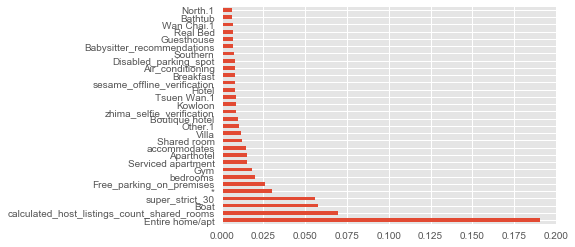

In [13]:
#print(xbgreg_best.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(xbgreg_best.feature_importances_, index=names)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()